In [1]:
# Import libraries

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # Adjusts the configuration of the plots we will create


# Read in the data

df = pd.read_csv(r'C:\Users\Chuah Wei Jie\Desktop\Lets GO\Project\NBA\Merged.csv',encoding='latin-1') # encoding='latin-1' due to utf-8 error

In [2]:
# Quick review of dataset

df.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,BLK,TOV,PF,PTS,Season,Rk,Team,Overall,Win,Loss
0,Paul Millsap,PF,31,ATL,69,67,34.0,6.2,14.1,0.442,...,0.9,2.3,2.7,18.1,2016-17,11,Atlanta Hawks,43-39,43,39
1,Dennis Schröder,PG,23,ATL,79,78,31.5,6.9,15.4,0.451,...,0.2,3.3,1.9,17.9,2016-17,11,Atlanta Hawks,43-39,43,39
2,Tim Hardaway Jr.,SG,24,ATL,79,30,27.3,5.3,11.5,0.455,...,0.2,1.3,1.3,14.5,2016-17,11,Atlanta Hawks,43-39,43,39
3,Dwight Howard,C,31,ATL,74,74,29.7,5.2,8.3,0.633,...,1.2,2.3,2.7,13.5,2016-17,11,Atlanta Hawks,43-39,43,39
4,Kent Bazemore,SF,27,ATL,73,64,26.9,4.0,9.9,0.409,...,0.7,1.7,2.3,11.0,2016-17,11,Atlanta Hawks,43-39,43,39


In [3]:
# checking if there is any missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,pct_missing))

Player - 0.0%
Pos - 0.0%
Age - 0.0%
Tm - 0.0%
G - 0.0%
GS - 0.0%
MP - 0.0%
FG - 0.0%
FGA - 0.0%
FG% - 0.0%
3P - 0.0%
3PA - 0.0%
3P% - 0.02339688041594454%
2P - 0.0%
2PA - 0.0%
2P% - 0.0%
eFG% - 0.0%
FT - 0.0%
FTA - 0.0%
FT% - 0.0%
ORB - 0.0%
DRB - 0.0%
TRB - 0.0%
AST - 0.0%
STL - 0.0%
BLK - 0.0%
TOV - 0.0%
PF - 0.0%
PTS - 0.0%
Season - 0.0%
Rk - 0.0%
Team - 0.0%
Overall - 0.0%
Win - 0.0%
Loss - 0.0%


In [4]:
# Re-read in the data after removing records of players without a team from csv file (Null fields in Team column)

df = pd.read_csv(r'C:\Users\Chuah Wei Jie\Desktop\Lets GO\Project\NBA\Merged.csv',encoding='latin-1') # encoding='latin-1' due to utf-8 error

In [5]:
# checking if there is any missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,pct_missing))

Player - 0.0%
Pos - 0.0%
Age - 0.0%
Tm - 0.0%
G - 0.0%
GS - 0.0%
MP - 0.0%
FG - 0.0%
FGA - 0.0%
FG% - 0.0%
3P - 0.0%
3PA - 0.0%
3P% - 0.02339688041594454%
2P - 0.0%
2PA - 0.0%
2P% - 0.0%
eFG% - 0.0%
FT - 0.0%
FTA - 0.0%
FT% - 0.0%
ORB - 0.0%
DRB - 0.0%
TRB - 0.0%
AST - 0.0%
STL - 0.0%
BLK - 0.0%
TOV - 0.0%
PF - 0.0%
PTS - 0.0%
Season - 0.0%
Rk - 0.0%
Team - 0.0%
Overall - 0.0%
Win - 0.0%
Loss - 0.0%


In [6]:
# replacing null fields in 3P% with 0 (Players did not attempt any 3-point shots)

df["3P%"].fillna(0, inplace=True)

In [7]:
# checking if there is any missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,pct_missing))

Player - 0.0%
Pos - 0.0%
Age - 0.0%
Tm - 0.0%
G - 0.0%
GS - 0.0%
MP - 0.0%
FG - 0.0%
FGA - 0.0%
FG% - 0.0%
3P - 0.0%
3PA - 0.0%
3P% - 0.0%
2P - 0.0%
2PA - 0.0%
2P% - 0.0%
eFG% - 0.0%
FT - 0.0%
FTA - 0.0%
FT% - 0.0%
ORB - 0.0%
DRB - 0.0%
TRB - 0.0%
AST - 0.0%
STL - 0.0%
BLK - 0.0%
TOV - 0.0%
PF - 0.0%
PTS - 0.0%
Season - 0.0%
Rk - 0.0%
Team - 0.0%
Overall - 0.0%
Win - 0.0%
Loss - 0.0%


In [8]:
# data types of columns

df.dtypes

Player      object
Pos         object
Age          int64
Tm          object
G            int64
GS           int64
MP         float64
FG         float64
FGA        float64
FG%        float64
3P         float64
3PA        float64
3P%        float64
2P         float64
2PA        float64
2P%        float64
eFG%       float64
FT         float64
FTA        float64
FT%        float64
ORB        float64
DRB        float64
TRB        float64
AST        float64
STL        float64
BLK        float64
TOV        float64
PF         float64
PTS        float64
Season      object
Rk           int64
Team        object
Overall     object
Win          int64
Loss         int64
dtype: object

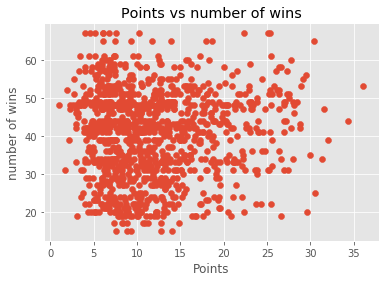

In [9]:
# scatter plot with number of wins vs Points

plt.scatter(x=df['PTS'], y=df['Win'])

plt.title('Points vs number of wins')
plt.xlabel('Points')
plt.ylabel('number of wins')

plt.show()

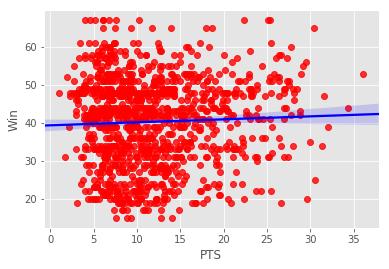

In [10]:
# plot number of wins vs points using seaborn

sns.regplot(x='PTS', y='Win', data=df, scatter_kws={"color": "red"}, line_kws={"color": "blue"})

In [11]:
# finding correlation
pd.set_option('display.max_columns',None)

df.corr() # Pearson(default), Kendall, Spearman --> different types of correlation

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Rk,Win,Loss
Age,1.000000,0.038646,0.008049,0.028166,-0.015986,-0.013063,-0.010282,0.113843,0.087339,0.065791,-0.071027,-0.073010,-0.006061,0.113420,-0.010740,-0.037203,0.139464,-0.059437,0.012407,-0.011362,0.089329,0.000412,-0.047099,-0.024354,-0.091722,0.002425,-0.229851,0.239870,-0.209572
G,0.038646,1.000000,0.259166,0.166450,0.087096,0.077382,0.044701,-0.010925,-0.016892,-0.032929,0.103355,0.110240,-0.018024,0.005647,0.032517,0.042328,0.012431,0.091861,0.098426,0.102742,0.020126,0.078927,0.079759,0.059696,0.130848,0.067608,-0.078693,0.224498,0.064737
GS,0.008049,0.259166,1.000000,0.798859,0.647823,0.632044,0.102678,0.317023,0.323507,0.039298,0.587231,0.602013,0.038314,0.061354,0.509488,0.519959,0.119437,0.295296,0.535496,0.493345,0.435502,0.492625,0.286733,0.559368,0.485711,0.630198,-0.027453,0.046593,-0.003122
MP,0.028166,0.166450,0.798859,1.000000,0.833916,0.850945,-0.011485,0.542857,0.561425,0.175476,0.693852,0.728864,-0.045846,0.014296,0.676161,0.671796,0.271186,0.184255,0.550318,0.466900,0.612384,0.639170,0.187614,0.722474,0.473304,0.835847,-0.004956,-0.007840,-0.005968
FG,-0.015986,0.087096,0.647823,0.833916,1.000000,0.969546,0.166884,0.478814,0.496123,0.113545,0.911742,0.923029,0.088785,0.100481,0.837736,0.835147,0.265747,0.256654,0.577091,0.510785,0.607997,0.495728,0.227933,0.810667,0.398656,0.983920,-0.049562,0.036461,-0.054768
FGA,-0.013063,0.077382,0.632044,0.850945,0.969546,1.000000,-0.053548,0.609764,0.640628,0.209742,0.815960,0.868892,-0.105629,-0.073595,0.825365,0.802144,0.357229,0.088429,0.472054,0.377412,0.646272,0.526723,0.097107,0.818352,0.336734,0.978355,-0.012686,-0.000642,-0.017449
FG%,-0.010282,0.044701,0.102678,-0.011485,0.166884,-0.053548,1.000000,-0.449197,-0.500055,-0.433674,0.400467,0.253581,0.848119,0.789368,0.099882,0.178307,-0.386862,0.687741,0.418838,0.537809,-0.104714,-0.090818,0.543371,0.033234,0.304692,0.077999,-0.113209,0.110456,-0.119443
3P,0.113843,-0.010925,0.317023,0.542857,0.478814,0.609764,-0.449197,1.000000,0.987155,0.552128,0.076624,0.145345,-0.305852,-0.016302,0.356520,0.271115,0.549206,-0.431226,-0.007234,-0.148648,0.367609,0.305180,-0.267946,0.368080,0.018059,0.571398,-0.099976,0.062753,-0.124459
3PA,0.087339,-0.016892,0.323507,0.561425,0.496123,0.640628,-0.500055,0.987155,1.000000,0.525804,0.101871,0.176686,-0.331524,-0.104169,0.393368,0.310991,0.537989,-0.436725,0.004990,-0.141644,0.404425,0.335576,-0.266685,0.412152,0.032523,0.591030,-0.070724,0.033964,-0.095947
3P%,0.065791,-0.032929,0.039298,0.175476,0.113545,0.209742,-0.433674,0.552128,0.525804,1.000000,-0.129255,-0.069877,-0.300550,-0.064730,0.038288,-0.043352,0.476154,-0.492157,-0.192551,-0.306212,0.141633,0.109628,-0.343070,0.054359,-0.135255,0.169545,-0.065124,0.045008,-0.087023


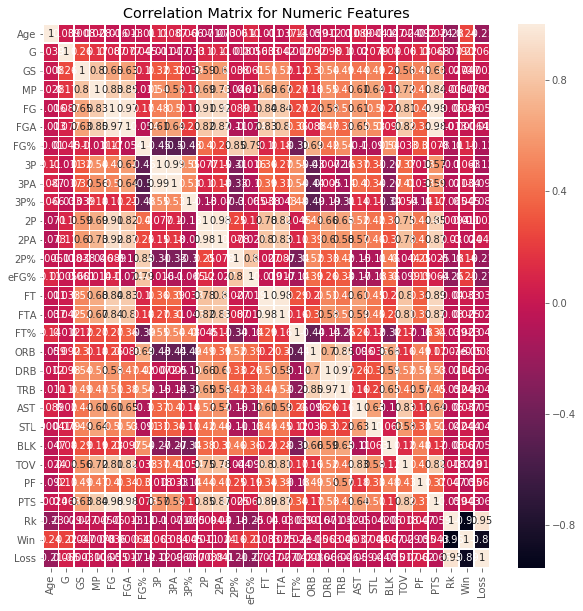

In [12]:
# visualising Correlation matrix using Pearson Correlation

correlation_matrix = df.corr()

fig, ax = plt.subplots(figsize=(10,10)) 

sns.heatmap(correlation_matrix.iloc[:,:], annot=True, linewidths=.5, ax=ax)
#(df1.iloc[:, 1:6:], annot=True, linewidths=.5, ax=ax)

plt.title('Correlation Matrix for Numeric Features')

plt.show()

In [13]:
# export correlation matrix to excel for better visualization on Excel

correlation_matrix.to_excel(r'C:\Users\Chuah Wei Jie\Desktop\Lets GO\Project\NBA\Visualization\Correlation.xlsx')